<a href="https://colab.research.google.com/github/mohsinziabutt/Applied-AI-Challenge-2/blob/main/NLP_Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import warnings
warnings.filterwarnings("ignore")

# import libraries
import pandas as pd
import numpy as np

# libraries for data preprocessing
import nltk
# download modules available with NLTK
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# libraries for data split and feature extraction
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# library for evaluation
from sklearn import metrics

# libraries for ML algorithms
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

# libraries for data plotting
import seaborn as sns
import matplotlib.pyplot as plt 

RANDOM_SEED = 100

[nltk_data] Downloading package punkt to C:\Users\Mohsin Zia
[nltk_data]     Butt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Mohsin Zia
[nltk_data]     Butt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Mohsin Zia
[nltk_data]     Butt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Importing dataset**

In [104]:
tweets_data = pd.read_csv('https://raw.githubusercontent.com/mohsinziabutt/Applied-AI-Challenge-2/main/dataset/train.csv')
tweets_data.head()

,Id,Text,Sentiment
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
1,088c60f138,my boss is bullying me...,negative
2,9642c003ef,what interview! leave me alone,negative
3,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive


# **Checking if there is any sentiment in the column other than negative and positive**

Sentiment
negative    7781
positive    8582
dtype: int64


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

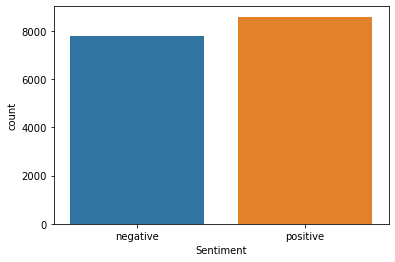

In [46]:
print(tweets_data.pivot_table(columns=['Sentiment'], aggfunc='size'))

# Summarise class details
sns.countplot(x=tweets_data['Sentiment'])

# **Data Pre-Processing**

**1. Tokenisation**

In [47]:
# iterate through each row in 'Text' columm and convert text to tokens
list_tokenised_text = [word_tokenize(text) for text in tweets_data['Text']]
print(list_tokenised_text[:2])

list_tokenised_sentences = [' '.join(tokens) for tokens in list_tokenised_text]
print(list_tokenised_sentences[:2])

# add new column to data frame
tweets_data['Tokenised_Text'] = list_tokenised_sentences
tweets_data.head()

[['Sooo', 'SAD', 'I', 'will', 'miss', 'you', 'here', 'in', 'San', 'Diego', '!', '!', '!'], ['my', 'boss', 'is', 'bullying', 'me', '...']]
['Sooo SAD I will miss you here in San Diego ! ! !', 'my boss is bullying me ...']


,Id,Text,Sentiment,Tokenised_Text
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,Sooo SAD I will miss you here in San Diego ! ! !
1,088c60f138,my boss is bullying me...,negative,my boss is bullying me ...
2,9642c003ef,what interview! leave me alone,negative,what interview ! leave me alone
3,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,"Sons of * * * * , why couldn ` t they put them..."
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,2am feedings for the baby are fun when he is a...


**2. Text Normalisation**

In [48]:
wnl = WordNetLemmatizer()

list_lemmatised_sentences = []

# iterate through each list of tokens and lemmatise the tokens
for tokens in list_tokenised_text:
  lemma_words = [wnl.lemmatize(word) for word in tokens]
  lemma_sentence = ' '.join(lemma_words)
  list_lemmatised_sentences.append(lemma_sentence)
  
print(list_lemmatised_sentences[:2])

# add new column to data frame
tweets_data['Lemmatised_Text'] = list_lemmatised_sentences

tweets_data.head()

['Sooo SAD I will miss you here in San Diego ! ! !', 'my bos is bullying me ...']


,Id,Text,Sentiment,Tokenised_Text,Lemmatised_Text
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,Sooo SAD I will miss you here in San Diego ! ! !,Sooo SAD I will miss you here in San Diego ! ! !
1,088c60f138,my boss is bullying me...,negative,my boss is bullying me ...,my bos is bullying me ...
2,9642c003ef,what interview! leave me alone,negative,what interview ! leave me alone,what interview ! leave me alone
3,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,"Sons of * * * * , why couldn ` t they put them...","Sons of * * * * , why couldn ` t they put them..."
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,2am feedings for the baby are fun when he is a...,2am feeding for the baby are fun when he is al...


**3. Removing the punctuations**

In [61]:
tweets_data["NoPunctuationText"] = tweets_data['Lemmatised_Text'].str.replace('[^\w\s]','')
tweets_data.head()

,Id,Text,Sentiment,Tokenised_Text,Lemmatised_Text,NoPunctuationText
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,Sooo SAD I will miss you here in San Diego ! ! !,Sooo SAD I will miss you here in San Diego ! ! !,Sooo SAD I will miss you here in San Diego
1,088c60f138,my boss is bullying me...,negative,my boss is bullying me ...,my bos is bullying me ...,my bos is bullying me
2,9642c003ef,what interview! leave me alone,negative,what interview ! leave me alone,what interview ! leave me alone,what interview leave me alone
3,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,"Sons of * * * * , why couldn ` t they put them...","Sons of * * * * , why couldn ` t they put them...",Sons of why couldn t they put them on th...
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,2am feedings for the baby are fun when he is a...,2am feeding for the baby are fun when he is al...,2am feeding for the baby are fun when he is al...


**4. Processing the Stop Words**

In [68]:
# get English stopwords
stop_words = set(stopwords.words('english'))
print("#"*20, "Actual Stop Words", "#"*20)
print("Length:", len(stop_words), "\n")
print("Stop Words:", stop_words)

#remove words that are in NLTK stopwords list
not_stopwords = {"don't", "shouldn't", 'isn', 'didn', 'aren','shouldn', "wouldn't", "mustn't",
                 'wouldn', 'not', "mightn't", "aren't", "hasn't", "won't", "wasn't", "didn't", "weren't", "couldn't", "isn't"} 
final_stop_words = set([word for word in stop_words if word not in not_stopwords])

print("\n\n")
print("#"*20, "Updated Stop Words", "#"*20)
print("Length:", len(final_stop_words), "\n")
print("Stop Words:", final_stop_words)

#################### Actual Stop Words ####################
Length: 179 

Stop Words: {'that', 'same', 'ours', "don't", "shouldn't", "you've", 'most', 'hadn', 'from', 'can', 'isn', 'here', 'been', 'aren', 'down', 's', 're', 'didn', 'such', 'i', 'shouldn', 'he', 'does', 'during', "needn't", 'yourselves', 'be', 't', 'wasn', "it's", 'this', 'ourselves', "you'll", 'has', 'd', 'again', 'as', 'himself', "wouldn't", 'in', 'all', 'doing', 'there', 'his', "you're", "mustn't", 'him', 'who', 'don', 'then', 'her', 'no', 'wouldn', 'few', 'haven', 'not', 'and', 'so', 'they', 'how', 'being', 'between', 'each', "mightn't", 'am', 'did', "aren't", 'mustn', 'below', "she's", 'ain', 'into', 'only', 'than', 'theirs', 'against', 'for', "doesn't", 'were', 'do', 'hasn', 'are', 'these', 'its', 'yourself', 'should', 'off', 'an', 'too', 'just', 'up', 'a', 'me', "hasn't", 'm', 'herself', 'under', 'now', 'couldn', "won't", 'over', 'about', 'after', 'why', 've', "wasn't", 'nor', 'when', 'itself', 'what', 'weren', '

**5. Stemming**

In [69]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer

stop_words = final_stop_words
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to C:\Users\Mohsin Zia
[nltk_data]     Butt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
X=tweets_data['NoPunctuationText']
y=tweets_data['Sentiment']

**6. Removing Stop Words and applying Stemming**

In [72]:
import re

cleaned_data=[]
for i in range(len(X)):
    tweet=re.sub('[^a-zA-Z]',' ',X.iloc[i])
    tweet=tweet.lower().split()
#     tweet=[stemmer.stem(word) for word in tweet]
    tweet=[stemmer.stem(word) for word in tweet if (word not in stop_words)]
    tweet=' '.join(tweet)
    cleaned_data.append(tweet)

tweets_data['Final Text'] = cleaned_data

tweets_data.head()

,Id,Text,Sentiment,Tokenised_Text,Lemmatised_Text,NoPunctuationText,Final Text
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,Sooo SAD I will miss you here in San Diego ! ! !,Sooo SAD I will miss you here in San Diego ! ! !,Sooo SAD I will miss you here in San Diego,sooo sad miss san diego
1,088c60f138,my boss is bullying me...,negative,my boss is bullying me ...,my bos is bullying me ...,my bos is bullying me,bo bulli
2,9642c003ef,what interview! leave me alone,negative,what interview ! leave me alone,what interview ! leave me alone,what interview leave me alone,interview leav alon
3,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,"Sons of * * * * , why couldn ` t they put them...","Sons of * * * * , why couldn ` t they put them...",Sons of why couldn t they put them on th...,son put releas alreadi bought
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,2am feedings for the baby are fun when he is a...,2am feeding for the baby are fun when he is al...,2am feeding for the baby are fun when he is al...,feed babi fun smile coo


**7. Bag of Words Approach using Count Vectorizer**

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=3000)
X_fin=cv.fit_transform(cleaned_data).toarray()

# **Converting the sentiments into numbers**

In [74]:
sentiment_ordering = ['negative', 'positive']
y = y.apply(lambda x: sentiment_ordering.index(x))

y.head()

0    0
1    0
2    0
3    0
4    1
Name: Sentiment, dtype: int64

# **Splitting the dataset into train and test data and fitting the model**

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_fin, y, test_size=0.3, random_state=100)

# **Model trainging and classification report**

In [83]:
models = []

models.append(MultinomialNB())
models.append(LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1))
models.append(GaussianNB())

In [87]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

cf = []
y_pred = []

for i in range(0, len(models)):
    models[i].fit(X_train, y_train)
    y_pred = models[i].predict(X_test)
    cf.append(classification_report(y_test,y_pred))
    print(models[i], "\n" + cf[i] + "\n")

MultinomialNB() 
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2398
           1       0.86      0.87      0.87      2511

    accuracy                           0.86      4909
   macro avg       0.86      0.86      0.86      4909
weighted avg       0.86      0.86      0.86      4909


LogisticRegression(C=2, max_iter=1000, n_jobs=-1) 
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      2398
           1       0.87      0.87      0.87      2511

    accuracy                           0.87      4909
   macro avg       0.87      0.87      0.87      4909
weighted avg       0.87      0.87      0.87      4909


GaussianNB() 
              precision    recall  f1-score   support

           0       0.76      0.64      0.70      2398
           1       0.70      0.81      0.75      2511

    accuracy                           0.73      4909
   macro avg       0.73      0.72      0.72 

**As we can see LogisticRegression gives the more accuracy, so we will use this model**

In [94]:
model = models[1]

# **Importing the testing file to generate the sentiments against new tweets**

In [103]:
#import the csv file with tweets to be labelled
new_tweets = pd.read_csv("https://raw.githubusercontent.com/mohsinziabutt/Applied-AI-Challenge-2/main/dataset/test.csv")
new_tweets = new_tweets[["Text"]]

new_tweets["Sentiment"] = ""
new_tweets.head()

,Text,Sentiment
0,Shanghai is also really exciting (precisely -...,
1,"Recession hit Veronique Branquinho, she has to...",
2,happy bday!,
3,http://twitpic.com/4w75p - I like it!!,
4,that`s great!! weee!! visitors!,


# **Converting the tweets into Bag of Words using Count Vectorizer**

In [96]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=3000)
X_fin2=cv.fit_transform(new_tweets['Text']).toarray()

# **Predicting the sentiments for new tweets**

In [97]:
new_sentiments = model.predict(X_fin2)
new_tweets["Sentiment"] = new_sentiments

# **Converting the Sentiments back from numeric to string**

In [98]:
sentiments = {1:'positive', 0:'negative'}
new_tweets["Sentiment"] = [sentiments[item] for item in new_tweets["Sentiment"]]

# **Saving final results as CSV file**

In [102]:
new_tweets = new_tweets[['Text', "Sentiment"]]
new_tweets.to_csv('New_Tweets_Predictions.csv', header=True, index=False)

# **Displaying the newly tested dataset**

In [101]:
pd.set_option("display.max_rows", None)
new_tweets.head(20)

,Text,Sentiment
0,Shanghai is also really exciting (precisely -...,positive
1,"Recession hit Veronique Branquinho, she has to...",positive
2,happy bday!,negative
3,http://twitpic.com/4w75p - I like it!!,positive
4,that`s great!! weee!! visitors!,negative
5,I THINK EVERYONE HATES ME ON HERE lol,positive
6,"soooooo wish i could, but im in school and my...",negative
7,My bike was put on hold...should have known th...,negative
8,"I`m in VA for the weekend, my youngest son tur...",negative
9,Its coming out the socket I feel like my phon...,negative
